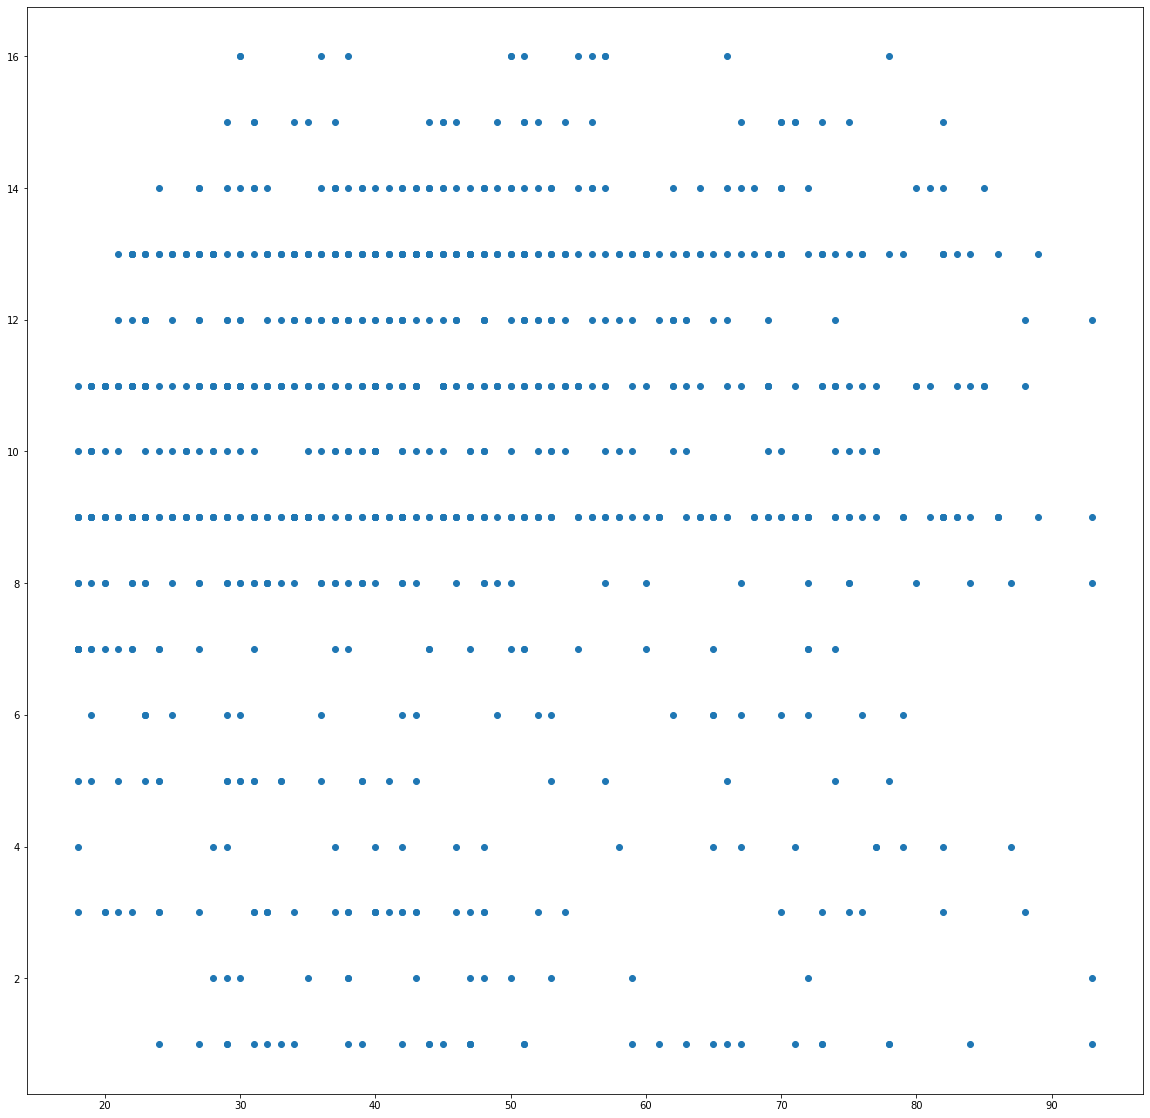

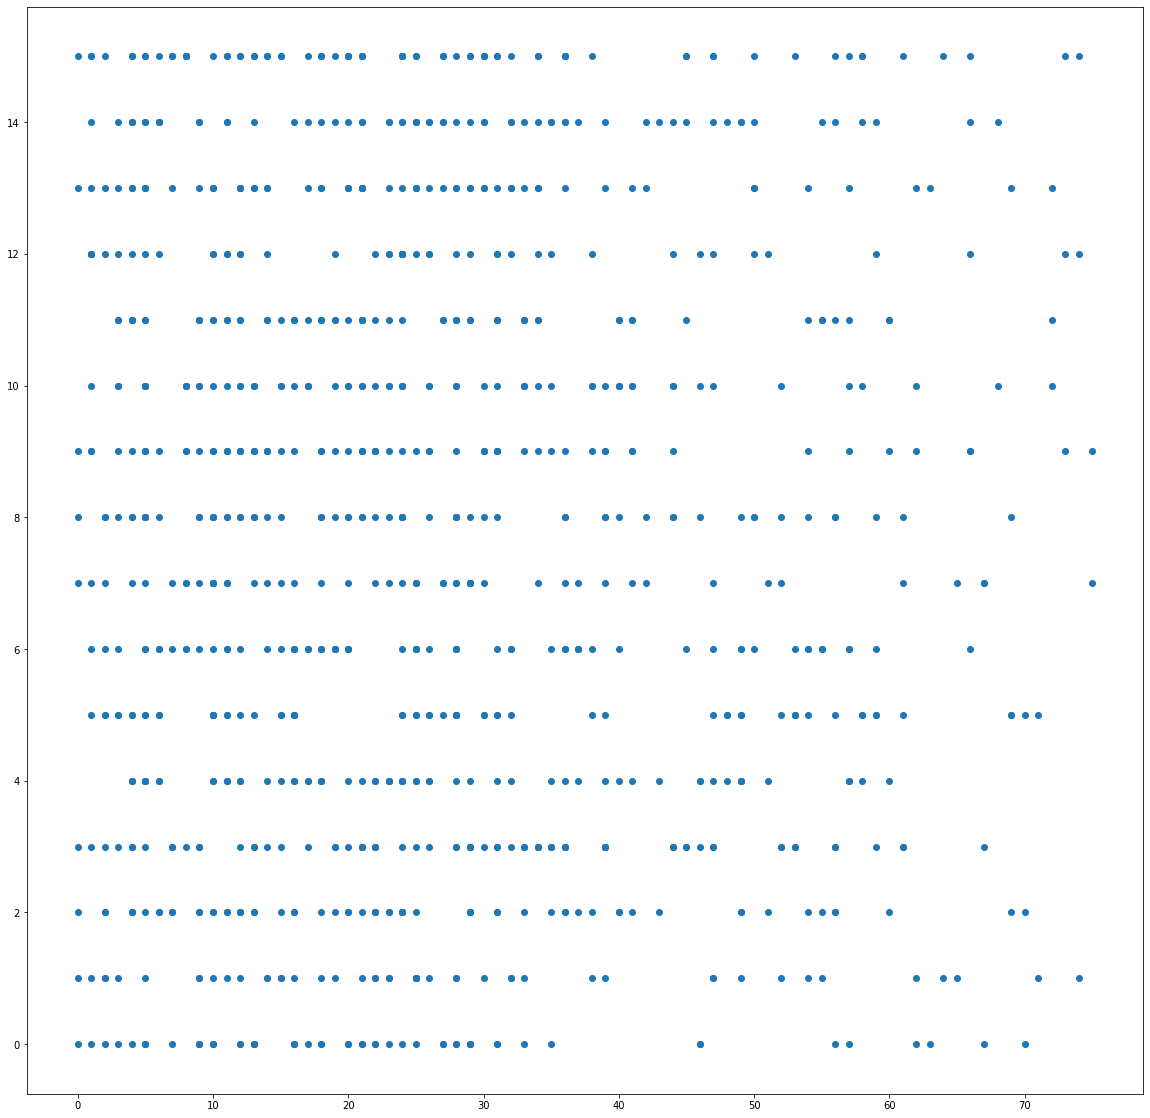

In [4]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pd_pums_real = pd.read_csv("datasets/PUMS.csv")
pd_pums_real.drop('pid', axis=1, inplace=True)
pd_pums_real.drop('income', axis=1, inplace=True)

pd_pums_fake = pd.read_csv("datasets/mwem_PUMS.csv")

pums_real = pd_pums_real.to_numpy()

pums_fake = pd_pums_fake.to_numpy()

x,y = pums_real[:,0], pums_real[:,2]
plt.scatter(x,y)
plt.show()

x,y = pums_fake[:,0], pums_fake[:,2]
plt.scatter(x,y)
plt.show()

In [1]:
%run modules/synthetic-data-module/synthetic_data.py "PUMS" "MWEMSynthesizer" 1000 3.0 1.0 mwem_PUMS_demo

Could not import from mlflow. Please upgrade to Mlflow 1.4.0 or higher.


ModuleNotFoundError: No module named 'opendp'

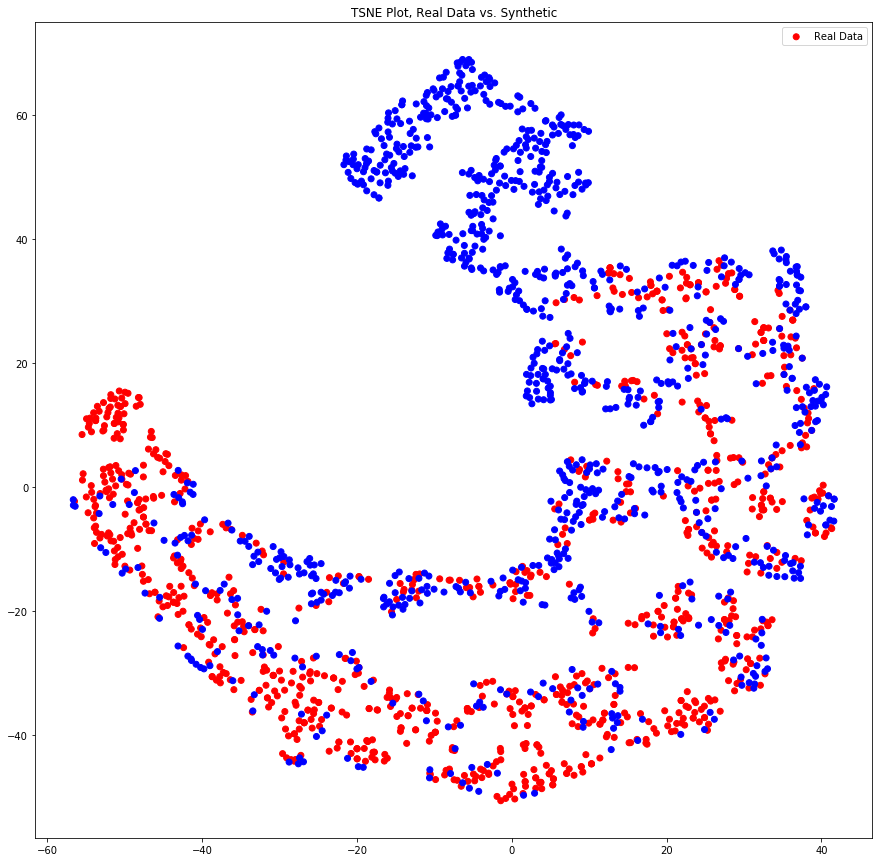

In [5]:
# t = 500
inds = []

comb = np.vstack((pums_real, pums_fake))
embedding_1 = TSNE(n_components=2).fit_transform(comb)
x,y = embedding_1.T
l = int(len(x) / 2)

plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(x,y,c=['purple' if i in inds else 'red' for i in range(l)]+['purple' if j in inds else 'blue' for j in range(l)])
plt.gca().legend(('Real Data','Real'))
# plt.xlabel('This is the X axis label')
# plt.ylabel('This is the Y axis label')
plt.title('TSNE Plot, Real Data vs. Synthetic')
plt.show()

In [ ]:
pd_pums_less_fake = pd.read_csv("datasets/mwem_PUMS_less_private.csv")

pums_less_fake = pd_pums_less_fake.to_numpy()

x,y = pums_real[:,0], pums_real[:,2]
plt.scatter(x,y)
plt.show()

x,y = pums_less_fake[:,0], pums_less_fake[:,2]
plt.scatter(x,y)
plt.show()

x,y = embedding_1.T
plt.scatter(x,y)
plt.show()

embedding_3 = TSNE(n_components=2).fit_transform(pums_less_fake)

x,y = embedding_3.T
plt.scatter(x,y)
plt.show()

In [ ]:
print(pd_pums_real.describe())
print(pd_pums_fake.describe())
print(pd_pums_less_fake.describe())

In [ ]:
import datacompy

comp = datacompy.Compare(
    pd_pums_real,
    pd_pums_fake,
    df1_name='Real', #Optional, defaults to 'df1'
    df2_name='Fake', #Optional, defaults to 'df2'
    on_index=True
)

print(comp.report())